# `01` Libraries

In [145]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pickle

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# `01` Data Collection

In [ ]:
data = pd.read_csv('data/people_wiki.csv')
data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...


In [3]:
data.columns

Index(['URI', 'name', 'text'], dtype='object')

In [4]:
data['URI']

0              <http://dbpedia.org/resource/Digby_Morrell>
1             <http://dbpedia.org/resource/Alfred_J._Lewy>
2              <http://dbpedia.org/resource/Harpdog_Brown>
3        <http://dbpedia.org/resource/Franz_Rottensteiner>
4                     <http://dbpedia.org/resource/G-Enka>
                               ...                        
59066             <http://dbpedia.org/resource/Olari_Elts>
59067         <http://dbpedia.org/resource/Scott_F._Crago>
59068    <http://dbpedia.org/resource/David_Cass_(footb...
59069            <http://dbpedia.org/resource/Keith_Elias>
59070           <http://dbpedia.org/resource/Fawaz_Damrah>
Name: URI, Length: 59071, dtype: object

In [5]:
data['name']

0                  Digby Morrell
1                 Alfred J. Lewy
2                  Harpdog Brown
3            Franz Rottensteiner
4                         G-Enka
                  ...           
59066                 Olari Elts
59067             Scott F. Crago
59068    David Cass (footballer)
59069                Keith Elias
59070               Fawaz Damrah
Name: name, Length: 59071, dtype: object

In [6]:
data['text'][0]

'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons vfla

In [7]:
data['text'][1]

'alfred j lewy aka sandy lewy graduated from university of chicago in 1973 after studying psychiatry pharmacology and ophthalmology he is a full professor and vicechair of the department of psychiatry at ohsu oregon health science university and holds an md and phd prior to moving to oregon in 1981 lewy was at the national institute of mental health nimh in bethesda maryland working with senior colleague thomas wehr in oregon he has worked closely with robert l sack as of december 2005 he had 94 publications available on pubmed he describes his research as follows my laboratory studies chronobiologic sleep and mood disorders these disorders include winter depression jet lag maladaptation to shift work and certain types of sleep disturbances relying on a very precise assay for plasma melatonin a hormone that has a clearly defined 24hour pattern of secretion biological rhythm disorders can be assessed and their treatment can be monitored current research is focused on developing bright l

In [8]:
data['text'][2]

'harpdog brown is a singer and harmonica player who has been active in canadas blues scene since 1982 hailing from vancouver he crossed tens of thousands of miles playing club dates and festivals in canada the northwestern united states and germanyover the years he has issued seven cds in 1995 his home is where the harp is won the muddy award for the best nw blues release from the cascade blues association in portland oregon as well that year it was nominated for a canadian juno for the best bluesgospel recording teamed up with graham guest on piano his cd naturally was voted 1 canadian blues album of 2010 by the blind lemon surveybrown tours extensively with his guitarist j arthur edmonds performing their electric mid1950s chicago blues either as a duo or with the full band while he is home he juggles a few combos working many venues big and small he also leads the harpdog brown band which is a gutsy traditional chicago blues band in 2014 they released what it is comprising mainly ori

# `02` Data Preprocessing
- **Cleaning**: Remove noise, handle missing values, and normalize text (e.g., lowercasing, stemming).
- **Tokenization**: Split text into tokens (words or phrases).
- **Stop Words Removal**: Eliminate common words that may not contribute to clustering (e.g., "the", "and").

### `2.1` Drop Columns [URI, name]

In [9]:
data.drop(columns=['URI', 'name'], inplace=True)

In [10]:
data

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
59066,olari elts born april 27 1971 in tallinn eston...
59067,scott francis crago born july 26 1963 twin bro...
59068,david william royce cass born 27 march 1962 in...
59069,keith hector elias born february 3 1972 in lac...


### `2.2` Function For Text Preprocessing

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

In [13]:
data['processed_text'] = data['text'].apply(preprocess_text)

In [14]:
data.head()

,text,processed_text
0,digby morrell born 10 october 1979 is a former...,digby morrell born october former australian r...
1,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated univers...
2,harpdog brown is a singer and harmonica player...,harpdog brown singer harmonica player active c...
3,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born waidmannsfeld lower a...
4,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december tallinn better know...


In [15]:
data.head()['text'][0]

'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons vfla

In [16]:
data.head()['processed_text'][0]

'digby morrell born october former australian rule footballer played kangaroo carlton australian football league aflfrom western australia morrell played early senior football west perth game senior career falcon spanned club leading goalkicker age morrell recruited australian football league kangaroo football club third round selection afl rookie draft forward twice kicked five goal time kangaroo first losing cause sydney following season drawn game brisbaneafter season morrell traded along david teague carlton football club exchange corey mckernan played game blue delisted end continued play victorian football league vfl football northern bullants carltons vflaffiliate acted playing assistant coach shifted box hill hawk retiring playing end season morrell senior coach strathmore football club essendon district football league leading club premier division premiership since coached west coburg football club also edflhe currently teach physical education parade college melbourne'

# `03` Feature Extraction
- **TF-IDF Vectorization**: Convert textual data into numerical features using Term Frequency-Inverse Document Frequency.

In [ ]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=2000) 
tfidf_matrix = vectorizer.fit_transform(data['processed_text'])

# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF Matrix Shape:", tfidf_df.shape)

tfidf_df.head()


TF-IDF Matrix Shape: (59071, 2000)


,abc,ability,able,abroad,academic,academy,accepted,acclaim,acclaimed,according,...,yale,yard,year,yet,york,young,younger,youngest,youth,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.059855,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.107815,0.081472,0.043076,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.076221,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [22]:
tfidf_df.columns

Index(['abc', 'ability', 'able', 'abroad', 'academic', 'academy', 'accepted',
       'acclaim', 'acclaimed', 'according',
       ...
       'yale', 'yard', 'year', 'yet', 'york', 'young', 'younger', 'youngest',
       'youth', 'zealand'],
      dtype='object', length=2000)

# `04` Clustering Algorithms
- **K-Means Clustering**: Partition documents into 'k' clusters based on feature similarity.

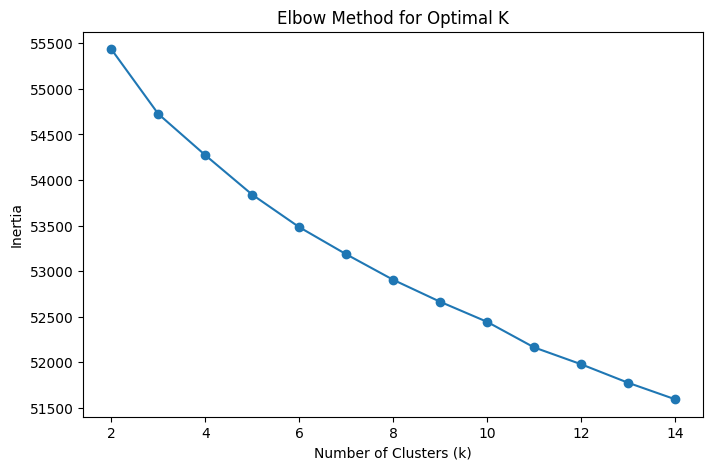

In [ ]:
inertia = []
k_values = range(2, 15) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=89, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

### Apply PCA on Data For Better Performance

In [ ]:
# make standerscaler before PCA
scaler = StandardScaler()
tfidf_scaled = scaler.fit_transform(tfidf_df)

# apply PCA to the most 3 components 
pca = PCA(n_components=3) 
pca_result = pca.fit_transform(tfidf_scaled)

# then apply the kmeans model
kmeans = KMeans(n_clusters=3, random_state=89)  # Adjust the number of clusters (k) as needed
kmeans.fit(pca_result)

In [ ]:
# save the cluster labels in my dataset
data['clusters'] = kmeans.labels_

In [26]:
data

,text,processed_text,clusters
0,digby morrell born 10 october 1979 is a former...,digby morrell born october former australian r...,0
1,alfred j lewy aka sandy lewy graduated from un...,alfred j lewy aka sandy lewy graduated univers...,1
2,harpdog brown is a singer and harmonica player...,harpdog brown singer harmonica player active c...,2
3,franz rottensteiner born in waidmannsfeld lowe...,franz rottensteiner born waidmannsfeld lower a...,2
4,henry krvits born 30 december 1974 in tallinn ...,henry krvits born december tallinn better know...,2
...,...,...,...
59066,olari elts born april 27 1971 in tallinn eston...,olari elts born april tallinn estonia estonian...,2
59067,scott francis crago born july 26 1963 twin bro...,scott francis crago born july twin brother jef...,2
59068,david william royce cass born 27 march 1962 in...,david william royce cass born march forest gat...,0
59069,keith hector elias born february 3 1972 in lac...,keith hector elia born february lacey township...,0


In [27]:
data['clusters'].value_counts()

clusters
2    23510
1    22889
0    12672
Name: count, dtype: int64

# `05` Evaluation of Clusters
- **Silhouette Score**: Measure how similar a document is to its own cluster compared to other clusters.

In [ ]:
silhouette_avg_kmeans_pca = silhouette_score(pca_result, kmeans.labels_)
print(f"Silhouette Score after PCA (K-Means): {silhouette_avg_kmeans_pca}")

Silhouette Score after PCA (K-Means): 0.44415108248390284


# `06` Visualization

### `6.1` Using PCA

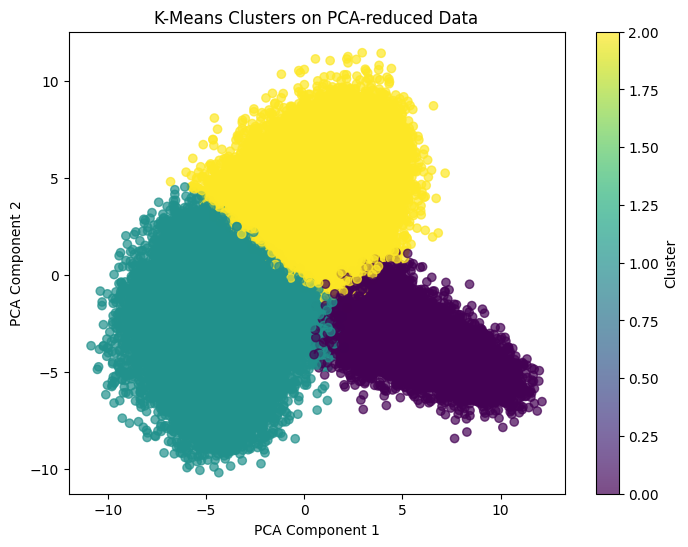

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title("K-Means Clusters on PCA-reduced Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

### `6.2` Using t-SNE 

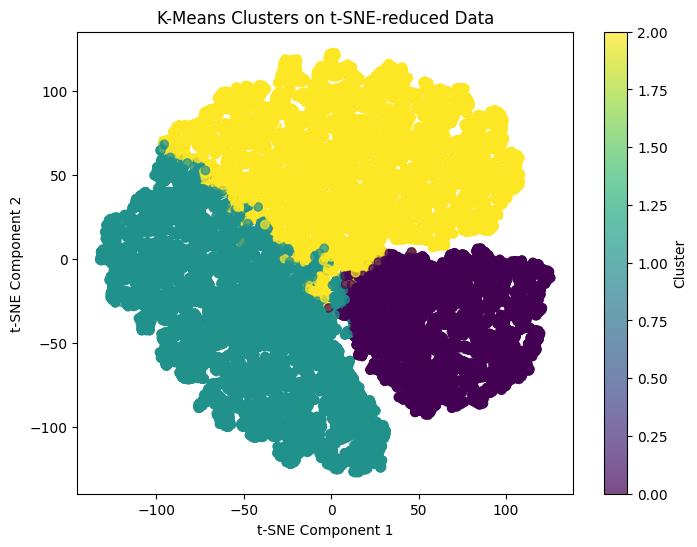

In [ ]:
tsne = TSNE(n_components=2, random_state=89, perplexity=30)  # You can tune perplexity as needed
tsne_result = tsne.fit_transform(pca_result)

# Step 7: Visualize the clusters using t-SNE for K-Means
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title("K-Means Clusters on t-SNE-reduced Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster")
plt.show()

### Make The Labels More Meaningful

In [ ]:
# get the original data to search for the job title for each name in each label
original_data = pd.read_csv('data/people_wiki.csv')
original_data

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...
59067,<http://dbpedia.org/resource/Scott_F._Crago>,Scott F. Crago,scott francis crago born july 26 1963 twin bro...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...
59069,<http://dbpedia.org/resource/Keith_Elias>,Keith Elias,keith hector elias born february 3 1972 in lac...


In [ ]:
# add the labels to the original dataset
original_data['clusters'] = kmeans.labels_

In [ ]:
original_data[['URI','name', 'text']][original_data['clusters'] == 0] # sports

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
17,<http://dbpedia.org/resource/Paddy_Dunne_(Gael...,Paddy Dunne (Gaelic footballer),paddy dunne was a gaelic football player from ...
21,<http://dbpedia.org/resource/Ceiron_Thomas>,Ceiron Thomas,ceiron thomas born 23 october 1983 is a welsh ...
22,<http://dbpedia.org/resource/Adel_Sellimi>,Adel Sellimi,adel sellimi arabic was born on 16 november 19...
25,<http://dbpedia.org/resource/Vic_Stasiuk>,Vic Stasiuk,victor john stasiuk born may 23 1929 is a reti...
...,...,...,...
59052,<http://dbpedia.org/resource/Dave_Nilsson>,Dave Nilsson,david wayne nilsson born 14 december 1969 is a...
59054,<http://dbpedia.org/resource/Marina_Mulyayeva>,Marina Mulyayeva,marina vladimirovna mulyayeva kazakh born apri...
59065,<http://dbpedia.org/resource/Dee_Brown_(basket...,"Dee Brown (basketball, born 1968)",decovan kadell dee brown born november 29 1968...
59068,<http://dbpedia.org/resource/David_Cass_(footb...,David Cass (footballer),david william royce cass born 27 march 1962 in...


In [ ]:
original_data[['URI','name', 'text']][original_data['clusters'] == 1] # Business and Politics 

,URI,name,text
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...
13,<http://dbpedia.org/resource/Anthony_Gueterboc...,"Anthony Gueterbock, 18th Baron Berkeley",anthony fitzhardinge gueterbock 18th baron ber...
14,<http://dbpedia.org/resource/David_Chernushenko>,David Chernushenko,david chernushenko born june 1963 in calgary a...
16,<http://dbpedia.org/resource/Andrew_Pinsent>,Andrew Pinsent,fr andrew pinsent born 19 august 1966 is resea...
...,...,...,...
59061,<http://dbpedia.org/resource/Rod_Wilt>,Rod Wilt,rod wilt is a former republican member of the ...
59062,<http://dbpedia.org/resource/Scott_Baker_(judge)>,Scott Baker (judge),sir thomas scott gillespie baker born 10 decem...
59063,<http://dbpedia.org/resource/Dragoljub_Ojdani%...,Dragoljub Ojdani%C4%87,dragoljub ojdani serbian cyrillic born june 1 ...
59064,<http://dbpedia.org/resource/Oz_Bengur>,Oz Bengur,osman oz bengur born february 23 1949 is an am...


In [ ]:
original_data[['URI','name', 'text']][original_data['clusters'] == 2] # ART and Entertainment

,URI,name,text
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,sam henderson born october 18 1969 is an ameri...
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...
...,...,...,...
59058,<http://dbpedia.org/resource/George_Krause>,George Krause,george krause born 1937 philadelphia pennsylva...
59059,<http://dbpedia.org/resource/Sean_Slade>,Sean Slade,sean slade b november 14 1957 lansing michigan...
59060,<http://dbpedia.org/resource/Lynne_Lipton>,Lynne Lipton,lynne lipton is an american film stage televis...
59066,<http://dbpedia.org/resource/Olari_Elts>,Olari Elts,olari elts born april 27 1971 in tallinn eston...


In [152]:
original_data['text'][original_data['clusters'] == 2][2]

'harpdog brown is a singer and harmonica player who has been active in canadas blues scene since 1982 hailing from vancouver he crossed tens of thousands of miles playing club dates and festivals in canada the northwestern united states and germanyover the years he has issued seven cds in 1995 his home is where the harp is won the muddy award for the best nw blues release from the cascade blues association in portland oregon as well that year it was nominated for a canadian juno for the best bluesgospel recording teamed up with graham guest on piano his cd naturally was voted 1 canadian blues album of 2010 by the blind lemon surveybrown tours extensively with his guitarist j arthur edmonds performing their electric mid1950s chicago blues either as a duo or with the full band while he is home he juggles a few combos working many venues big and small he also leads the harpdog brown band which is a gutsy traditional chicago blues band in 2014 they released what it is comprising mainly ori

### Save Scaler, pca, vectorizer and Model Using Pickle

In [ ]:
with open('std_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

with open('PCA.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [153]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)